<a href="https://colab.research.google.com/github/najiba1tagiyeva-ai/najiba1tagiyeva-ai.github.io/blob/main/Regional_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd

def fetch_world_bank_indicator(country="AZE", indicator="EG.ELC.RNWX.ZS"):
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=200"
    r = requests.get(url).json()

    rows = []
    for item in r[1]:
        year = int(item["date"])
        value = item["value"]
        if value is not None:
            rows.append({
                "Year": year,
                indicator: float(value)
            })
    return pd.DataFrame(rows)



In [3]:
countries = {
    "AZE": "Azerbaijan",
    "GEO": "Georgia",
    "ARM": "Armenia"
}

indicator = "EG.ELC.RNWX.ZS"  # Renewable electricity share

dfs = []

for iso, name in countries.items():
    tmp = fetch_world_bank_indicator(iso, indicator)
    tmp = tmp.rename(columns={indicator: "Renewable_share_pct"})
    tmp["Country"] = name
    dfs.append(tmp)

regional_df = pd.concat(dfs, ignore_index=True)
regional_df = regional_df[regional_df["Year"] >= 2000]
regional_df = regional_df.sort_values(["Year", "Country"]).reset_index(drop=True)

regional_df.head()


,Year,Renewable_share_pct,Country
0,2000,0.001678,Armenia
1,2000,0.000000,Azerbaijan
2,2000,0.286907,Georgia
3,2001,-0.005222,Armenia
4,2001,0.000000,Azerbaijan


In [11]:
regional_df.columns



Index(['Year', 'Renewable_share_pct', 'Country'], dtype='object')

In [12]:
regional_df.head()


,Year,Renewable_share_pct,Country
0,2000,0.001678,Armenia
1,2000,0.000000,Azerbaijan
2,2000,0.286907,Georgia
3,2001,-0.005222,Armenia
4,2001,0.000000,Azerbaijan


In [14]:
regional_df.columns


Index(['Year', 'Renewable_share_pct', 'Country'], dtype='object')

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.
cumulative_df = (
    regional_df
    .groupby("Country")["Renewable_share_pct"]
    .mean()
    .reset_index()
)

# 2.
cumulative_df["Renewable_share_pct"] = cumulative_df["Renewable_share_pct"].round(2)

# 3.
cumulative_df = cumulative_df.sort_values("Renewable_share_pct", ascending=False)
cumulative_df


,Country,Renewable_share_pct
1,Azerbaijan,0.41
0,Armenia,0.19
2,Georgia,0.07


/tmp/ipython-input-4255718317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


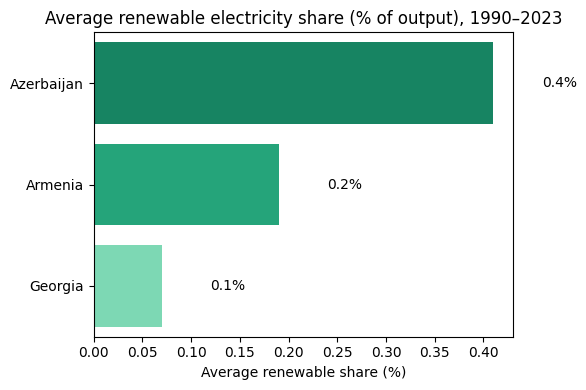

In [16]:
plt.figure(figsize=(6,4))

sns.barplot(
    data=cumulative_df,
    x="Renewable_share_pct",
    y="Country",
    orient="h",
    palette=["#059669", "#10B981", "#6EE7B7"][:len(cumulative_df)]  # yaşıl tonlar
)

plt.title("Average renewable electricity share (% of output), 1990–2023")
plt.xlabel("Average renewable share (%)")
plt.ylabel("")

#
for i, v in enumerate(cumulative_df["Renewable_share_pct"]):
    plt.text(v + 0.05, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()
